In [1]:
import pandas as pd
import numpy as np
# Libraries for Text Preprocessing
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Libraries for Visualization
import wordcloud
import matplotlib.pyplot as plt
import plotly.express as px
# Libraries for Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import neattext.functions as nfx
import string
import swifter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pujawardani/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
data_set = pd.read_csv('validation_data.csv')
data_set.head()

,text,hotel,lokasi,kamar,pelayanan,makanan,harga,sentiment
0,"Harga di hotel ini sangat terjangkau, makanan ...",1,0,0,0,1,1,positive
1,"Harga makanan di hotel ini sangat terjangkau, ...",0,0,0,1,1,1,positive
2,"Meskipun harganya terjangkau, makanan di hotel...",0,0,1,0,1,1,positive
3,"Hotel ini memiliki harga yang terjangkau, maka...",0,1,0,0,1,1,positive
4,Harga fasilitas di hotel ini sangat bersahabat...,1,0,0,0,1,1,positive


In [11]:
def cleaning(text):
    text = re.sub(r'\n',' ',text) # Hapus \n (enter)
    text = nfx.remove_hashtags(text) # Hapus hashtags
    text = nfx.remove_numbers(text) # Hapus number
    text = text.strip() # Hapus Whitespace
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) # Hapus karakter selain alfabet dan angka
    return text

data_set['content_cleaned'] = data_set['text'].apply(cleaning)

data_set.head()

,text,hotel,lokasi,kamar,pelayanan,makanan,harga,sentiment,content_cleaned
0,"Harga di hotel ini sangat terjangkau, makanan ...",1,0,0,0,1,1,positive,Harga di hotel ini sangat terjangkau makanan y...
1,"Harga makanan di hotel ini sangat terjangkau, ...",0,0,0,1,1,1,positive,Harga makanan di hotel ini sangat terjangkau p...
2,"Meskipun harganya terjangkau, makanan di hotel...",0,0,1,0,1,1,positive,Meskipun harganya terjangkau makanan di hotel ...
3,"Hotel ini memiliki harga yang terjangkau, maka...",0,1,0,0,1,1,positive,Hotel ini memiliki harga yang terjangkau makan...
4,Harga fasilitas di hotel ini sangat bersahabat...,1,0,0,0,1,1,positive,Harga fasilitas di hotel ini sangat bersahabat...


In [12]:
def casefolding(text):
    return text.lower()

data_set['content_cleaned'] = data_set['content_cleaned'].apply(casefolding)
data_set.head()

,text,hotel,lokasi,kamar,pelayanan,makanan,harga,sentiment,content_cleaned
0,"Harga di hotel ini sangat terjangkau, makanan ...",1,0,0,0,1,1,positive,harga di hotel ini sangat terjangkau makanan y...
1,"Harga makanan di hotel ini sangat terjangkau, ...",0,0,0,1,1,1,positive,harga makanan di hotel ini sangat terjangkau p...
2,"Meskipun harganya terjangkau, makanan di hotel...",0,0,1,0,1,1,positive,meskipun harganya terjangkau makanan di hotel ...
3,"Hotel ini memiliki harga yang terjangkau, maka...",0,1,0,0,1,1,positive,hotel ini memiliki harga yang terjangkau makan...
4,Harga fasilitas di hotel ini sangat bersahabat...,1,0,0,0,1,1,positive,harga fasilitas di hotel ini sangat bersahabat...


In [13]:
tokenizer=Tokenizer(num_words=1500)
tokenizer.fit_on_texts(data_set["content_cleaned"].values)
X=tokenizer.texts_to_sequences(data_set["content_cleaned"].values)
X=pad_sequences(X, maxlen=31, padding='post')

print(X)

[[14  5  3 ...  0  0  0]
 [14 24  5 ...  0  0  0]
 [28 30 18 ...  0  0  0]
 ...
 [27  3  4 ...  0  0  0]
 [28 17 10 ...  0  0  0]
 [27  3  4 ...  0  0  0]]


In [7]:
len(data_set['text'])

14

In [72]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model

data_set[['hotel', 'lokasi', 'kamar', 'pelayanan', 'makanan', 'harga']]

# Load model-model yang sudah disimpan
model_filenames = ['aspek_hotel.h5', 'aspek_lokasi.h5', 'aspek_kamar.h5', 'aspek_pelayanan.h5', 'aspek_makanan.h5', 'aspek_harga.h5']  # List of models
models = []
for filename in model_filenames:
    model = load_model(filename)
    models.append(model)


# Lakukan prediksi pada seluruh data test menggunakan setiap model
predictions = np.zeros((X.shape[0], len(models)))

for i, model in enumerate(models):
    preds = model.predict(X)
    preds_binary = np.where(preds > 0.5, 1, 0)
    for j, pred in enumerate(preds_binary):
        predictions[j][i] = pred[0]
        
prediction_aspect_result = predictions.astype(int)
        
# predictions.dtype
print(prediction_aspect_result)


[[1 1 1 1 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 0 1]
 [1 1 1 1 0 1]
 [1 1 1 1 0 1]
 [1 1 1 1 0 1]
 [1 1 1 1 0 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 1]
 [1 1 1 1 

In [78]:
# Mengambil nilai dari kolom X, Y, dan Z dan mengonversinya menjadi array
actual_aspek = data_set[['hotel', 'lokasi', 'kamar', 'pelayanan', 'makanan', 'harga']].values

# Menampilkan array nilai
# print(actual_aspek)

In [79]:
data_aspek_convert = pd.DataFrame({'hotel': actual_aspek[0]})
data_aspek_convert

,hotel
0,1
1,0
2,0
3,0
4,1
5,1


       False  True
False     28    29
True      32    31


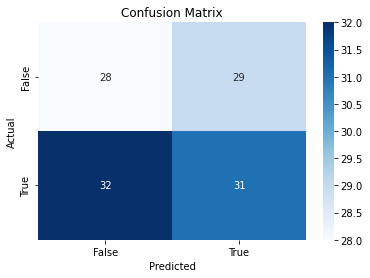

In [74]:
confusion_mat_aspek = confusion_matrix(np.ravel(prediction_aspect_result), np.ravel(actual_aspek))

confusion_df_aspek = pd.DataFrame(confusion_mat_aspek, index=['False', 'True'], columns=['False', 'True'])
print(confusion_df)

# Visualisasi confusion matrix
sns.heatmap(confusion_df, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# print(confusion_mat)

In [75]:
Accuracy = metrics.accuracy_score(np.ravel(actual_aspek), np.ravel(prediction_aspect_result))
Precision = metrics.precision_score(np.ravel(actual_aspek), np.ravel(prediction_aspect_result))
Sensitivity_recall = metrics.recall_score(np.ravel(actual_aspek), np.ravel(prediction_aspect_result))
F1_score = metrics.f1_score(np.ravel(actual_aspek), np.ravel(prediction_aspect_result))
print("Accuracy :", Accuracy)
print("Precision :", Precision)
print("Sensitivity_recall :", Sensitivity_recall)
print("F1_score :", F1_score)

Accuracy : 0.5013888888888889
Precision : 0.49855907780979825
Sensitivity_recall : 0.969187675070028
F1_score : 0.6584205518553757


In [23]:
model_sentiment = load_model('sentiment_aspek.h5')

threshold = 0.5
prediction_result = []

predictions_label = model_sentiment.predict(X)
predictions_label = tf.where(predictions_label < threshold, 0, 1)

for result in predictions_label:
    prediction_result.append(result[0].numpy())

print(prediction_result)

[1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0]


In [27]:
data = data_set['sentiment'].tolist()
sentiment_mapping = {'positive': 1, 'negative': 0}
actual_sentiment = [sentiment_mapping[sentiment] for sentiment in data]

print(actual_sentiment)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


       False  True
False     28    29
True      32    31


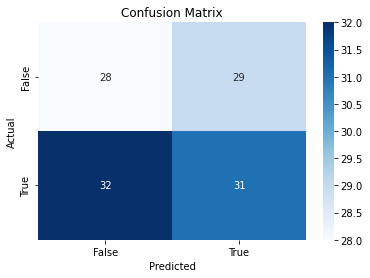

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Membuat confusion matrix
confusion_mat = confusion_matrix(prediction_result, actual_sentiment)

confusion_df = pd.DataFrame(confusion_mat, index=['False', 'True'], columns=['False', 'True'])
print(confusion_df)

# Visualisasi confusion matrix
sns.heatmap(confusion_df, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# print(confusion_mat)

In [29]:
Accuracy = metrics.accuracy_score(actual_sentiment, prediction_result)
Precision = metrics.precision_score(actual_sentiment, prediction_result)
Sensitivity_recall = metrics.recall_score(actual_sentiment, prediction_result)
F1_score = metrics.f1_score(actual_sentiment, prediction_result)
print("Accuracy :", Accuracy)
print("Precision :", Precision)
print("Sensitivity_recall :", Sensitivity_recall)
print("F1_score :", F1_score)

Accuracy : 0.49166666666666664
Precision : 0.49206349206349204
Sensitivity_recall : 0.5166666666666667
F1_score : 0.5040650406504066


       False  True
False      0     9
True       1     8


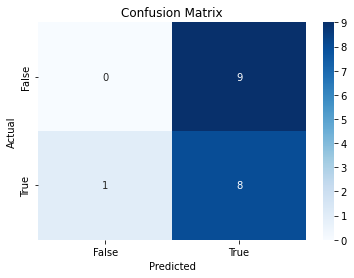

[[0 9]
 [1 8]]


In [77]:
from sklearn.metrics import confusion_matrix

actual = [[1, 0, 0, 0, 1, 1],
          [0, 0, 0, 1, 1, 1],
          [0, 0, 1, 0, 1, 1]]

predicted = [[1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 0, 1],
             [1, 1, 1, 1, 1, 1]]

# Menghitung confusion matrix
confusion_mat = confusion_matrix(np.ravel(actual), np.ravel(predicted))

confusion_df = pd.DataFrame(confusion_mat, index=['False', 'True'], columns=['False', 'True'])
print(confusion_df)

# Visualisasi confusion matrix
sns.heatmap(confusion_df, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# print(confusion_mat)

print(confusion_mat)
